In [43]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv("../data/steamWithIds-200k.csv")
play = df.loc[(df['playerGameStatus']=='play')].drop(columns = ["zero", "playerId", "playerGameStatus","Unnamed: 0"])
play

,gameTitle,time,gameId
1,The Elder Scrolls V: Skyrim,273.0,72850.0
3,Fallout 4,87.0,377160.0
5,Fallout: New Vegas,12.1,22380.0
7,Left 4 Dead 2,8.9,550.0
9,HuniePop,8.5,339800.0
...,...,...,...
142305,Rogue Legacy,2.6,241600.0
142307,Magic Duels,2.2,316010.0
142309,Titan Souls,1.5,297130.0
142311,Grand Theft Auto Vice City,1.5,12110.0


In [45]:
game_info = play.groupby('gameTitle').agg(['mean', 'count']).drop(columns = [('gameId',  'mean'), ('gameId',  'count')])

In [48]:
game_info = game_info.sort_values(by=[('time',  'count')], ascending=False)
game_info

time      
                                       mean count
gameTitle                                        
Dota 2                           202.785499  4841
Team Fortress 2                   74.762505  2323
Counter-Strike Global Offensive  234.402033  1377
Unturned                          15.057437  1069
Left 4 Dead 2                     41.943446   801
...                                     ...   ...
FRACT OSC                          0.500000     1
Shallow Space                      0.600000     1
FLOCK!                             0.100000     1
FIST OF AWESOME                    1.300000     1
Drakensang The River of Time       1.800000     1

[2534 rows x 2 columns]

Text(0, 0.5, 'Number of players')

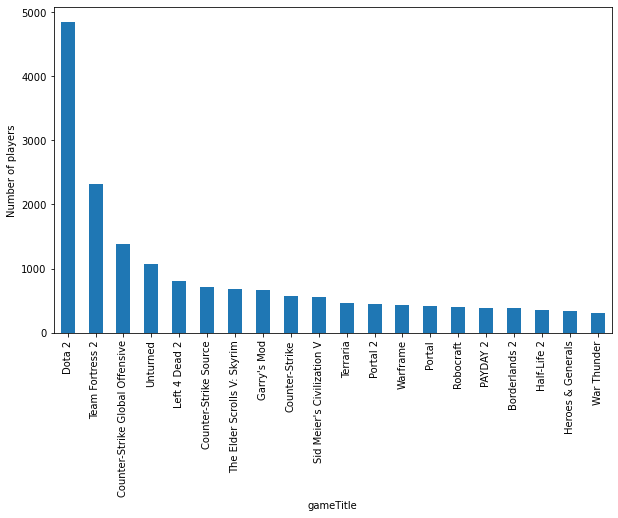

In [64]:
game_plot = game_info[0:20]
ax = game_plot.plot.bar(y=('time',  'count'), figsize = (10,6),rot=90, legend=False)
ax.set_ylabel("Number of players")

Text(0, 0.5, 'Mean time played (h)')

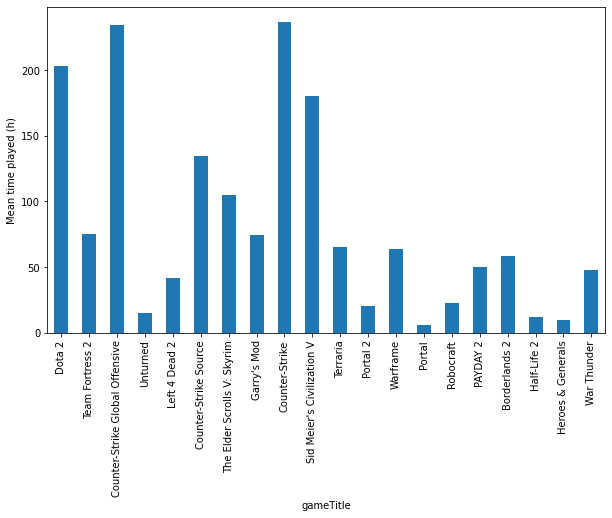

In [67]:
ax = game_plot.plot.bar(y=('time',  'mean'), figsize = (10,6),rot=90, legend=False)
ax.set_ylabel("Mean time played (h)")

In [ ]:
# rating based on time played... specific for each game
